In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
# to see what kind of final tmbd data file i have in the Data folder.
q = 'Data/final_tmdb_data_*.csv.gz'
chunked_files = sorted(glob.glob(q))
chunked_files

['Data/final_tmdb_data_2000.csv.gz', 'Data/final_tmdb_data_2001.csv.gz']

In [3]:
df2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
df2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')

## Comine df2000 and df2001 to one Data Frame



In [4]:
# Create list with all my dataframes and combine all together into 1 data Frame
df_list = []
for file in chunked_files:
    temp_df = pd.read_csv(file, index_col=0)
    df_list.append(temp_df)

df_combined = pd.concat(df_list, ignore_index=True)
print("Total rows :", len(df_combined))   

Total rows : 2500


## Cleaning Data

In [5]:
df_1 = df_combined.copy()

In [6]:
# Drop duplicates
df_1.drop_duplicates(inplace=True)
df_1.duplicated().sum()

0

In [7]:
# Take a look for the data to find any missing values
df_1.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certificiation
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.10,8.0,NaN
3,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.11,2020.0,PG


In [8]:
# In the certification column, I need to fix some typos
df_1['certificiation'].value_counts().index

Index(['R', 'PG-13', 'NR', 'PG', 'G', 'NC-17', 'Unrated', '-'], dtype='object')

In [10]:
# Correction if there has something typos
df_1 = df_1[df_1['certificiation'] != '-']
df_1['certificiation'] = df_1['certificiation'].replace({'NR':'UR', 'Unrated':'UR', 'Not Rated':'UR'})
df_1['certificiation'].value_counts().index

/var/folders/gt/gwn7gl_j04q9pt22drl446fr0000gn/T/ipykernel_20469/4206010074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['certificiation'] = df_1['certificiation'].replace({'NR':'UR', 'Unrated':'UR', 'Not Rated':'UR'})


Index(['R', 'PG-13', 'UR', 'PG', 'G', 'NC-17'], dtype='object')

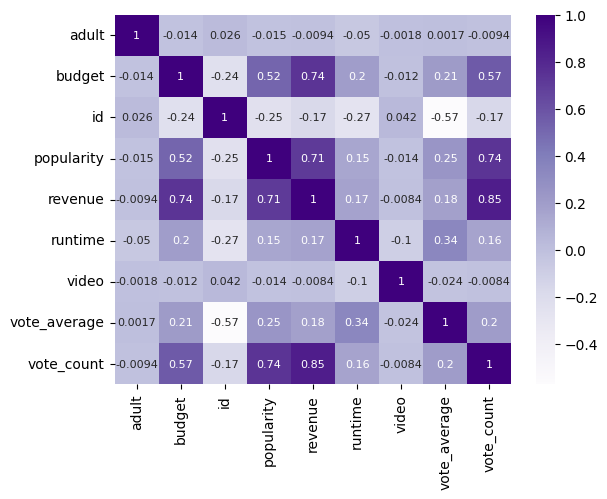

In [15]:
corr = df_1.corr()
sns.heatmap(corr, cmap='Purples', annot=True, annot_kws={'size': 8});

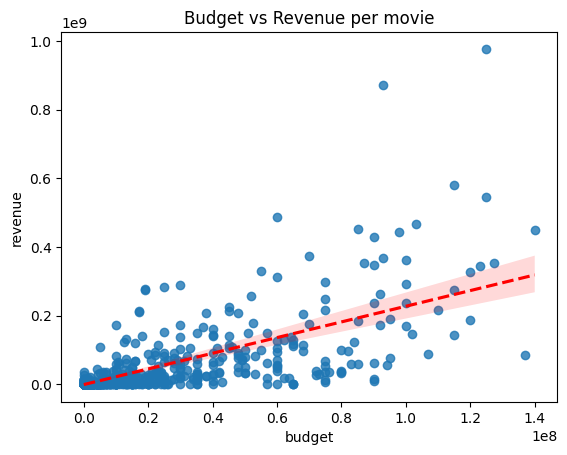

In [17]:
# use regplot to see Budget vs Revenue columns
sns.regplot(data=df_1, x='budget', y='revenue', line_kws={'color':'red', 'ls': '--'});
plt.title("Budget vs Revenue per movie");

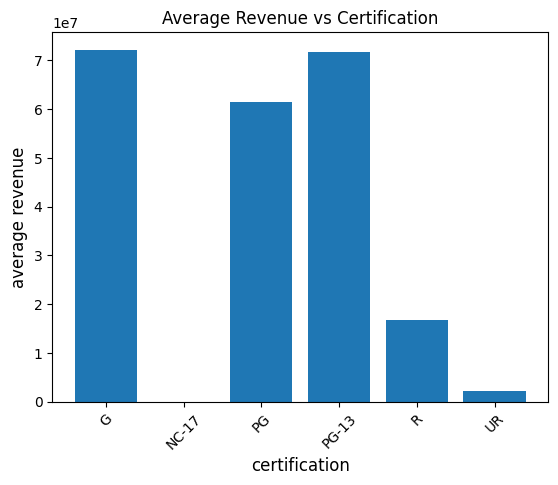

In [23]:
# average revenue per certification category
temp = df_1.groupby('certificiation')['revenue'].mean()
plt.bar(temp.index, temp.values);
plt.ylabel('average revenue', fontsize=12)
plt.xlabel('certification', fontsize=12)
plt.title('Average Revenue vs Certification');
plt.xticks(rotation = 45);

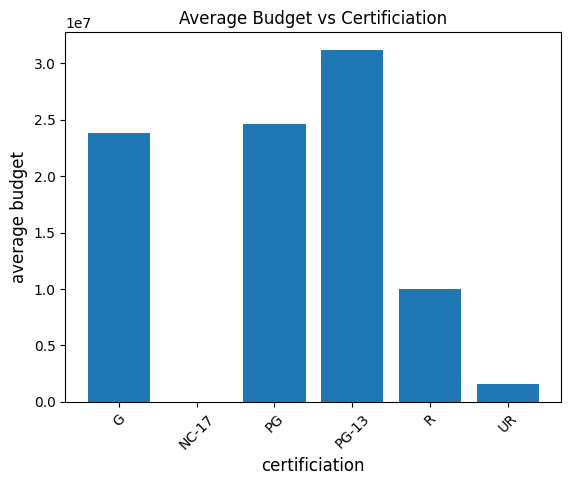

In [22]:
# average budget per certification category
temp = df_1.groupby('certificiation')['budget'].mean()
plt.bar(temp.index, temp.values);
plt.ylabel('average budget', fontsize=12)
plt.xlabel('certificiation', fontsize=12)
plt.title('Average Budget vs Certificiation');
plt.xticks(rotation = 45);

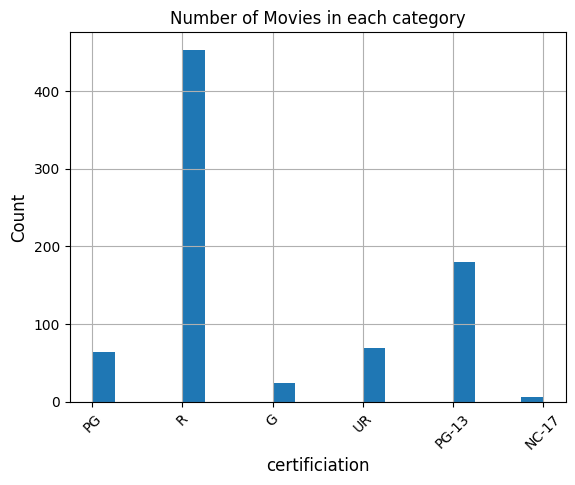

In [24]:
# how many movies are presents in each certification categories
df_1['certificiation'].hist(bins=20)
plt.ylabel('Count', fontsize=12)
plt.xlabel('certificiation', fontsize=12)
plt.title('Number of Movies in each category');
plt.xticks(rotation = 45);